In [4]:
# Code Snippet 1-1 Python Implementation of Perceptron Function 
# First element in vector x must be 1.
# Length of w and x must be n+1 for neuron with n inputs.
def compute_output(w,x):
    z = 0.0
    for i in range(len(w)):
        z += x[i] * w[i]     # Compute sum of weighted inputs
    # Apply sign function
    if z < 0:
        return -1
    else:
        return 1

In [5]:
w = [0.9,-0.6,-0.5]
data_set = [
    [1.0,-1.0,-1.0],
    [1.0,-1.0,1.0],
    [1.0,1.0,-1.0],
    [1.0,1.0,1.0]
]
results = [
 compute_output(w, data_set[0]),
 compute_output(w, data_set[1]),
 compute_output(w, data_set[2]),
 compute_output(w, data_set[3])
]
print(results)

[1, 1, 1, -1]


In [6]:
# Code Snippet 1-2 Initialization Code for Our Perceptron Learning Example
# Code Snippet 1-5 Extended Version Of Initialization Code with Function to Plot the Output
import random 
import matplotlib.pyplot as plt

# Define variables needed for plotting.
color_list = ['r-','m-','y-','c-','b-','g-']
color_index = 0
weight_iteration = 0
storage = {}
ONE_TO_NEG_N_POWER = 1e-5

# Code Snippet 1-2 Initialization Code for Our Perceptron Learning Example
# Code Snippet 1-5 Extended Version Of Initialization Code with Function to Plot the Output
def save_learning(w):
    global weight_iteration
    print('w0 =','%5.2f' % w[0], ', w1 =', '%5.2f' % w[1], ', w2 =', '%5.2f' % w[2])
    x = [-2.0, 2.0]
    if abs(w[2]) < ONE_TO_NEG_N_POWER:
        y = [
          -w[1]/(ONE_TO_NEG_N_POWER)*(-2.0)+(-w[0]/(ONE_TO_NEG_N_POWER)),
          -w[1]/(ONE_TO_NEG_N_POWER)*(2.0)+(-w[0]/(ONE_TO_NEG_N_POWER))
        ]
    else:
        y = [
          -w[1]/w[2]*(-2.0)+(-w[0]/w[2]),
          -w[1]/w[2]*(2.0)+(-w[0]/w[2])
        ]
    storage[weight_iteration] = y
    weight_iteration += 1

In [7]:
def show_learning():
    global color_index
    curr_index = 1
    plt.plot([1.0],[1.0],'b_',markersize=12)
    plt.plot([-1.0,1.0,-1.0],[1.0,-1.0,-1.0], 'r+', markersize=12)
    plt.axis([-2,2,-2,2])
    plt.xlabel('x1')
    plt.ylabel('x2')
    x = [-2.0,2.0]
    for obj in storage:
        str_line_label = "w_line " + str(curr_index)
        plt.plot(x,storage.get(obj), color_list[color_index], label=str_line_label)
        color_index += 1
        curr_index += 1
    plt.legend()
    plt.show()

In [8]:
# Define variables needed to control training process.
random.seed(7) # To make repeatable
LEARNING_RATE = 0.1
index_list = [0,1,2,3] # Used to randomize order

# Define training examples.
x_train = [
    (1.0,-1.0,-1.0),
    (1.0,-1.0,1.0),
    (1.0,1.0,-1.0),
    (1.0,1.0,1.0)
] # Inputs
y_train = [1.0,1.0,1.0,-1.0] # Output (ground truth)

# Define perceptron weights. 
w = [0.2, -0.6, 0.25] # Initialize to some "random" numbers

# Print initial weights
save_learning(w)

w0 =  0.20 , w1 = -0.60 , w2 =  0.25


In [9]:
# Perceptron training loop.
all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list)
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w,x) # Perceptron function
        if y != p_out: # Update weights when wrong
            for j in range(0, len(w)):
                w[j] += (y * LEARNING_RATE * x[j])
            all_correct = False
            save_learning(w) # Show updated weights

w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.05
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15


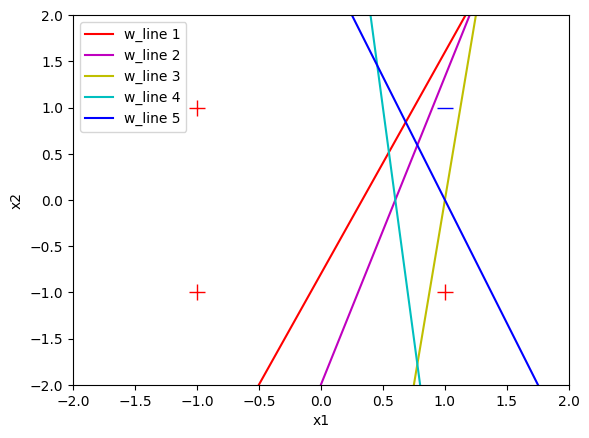

In [10]:
show_learning()